# *📊 Employee Attrition - Feature Engineering*

---

## *Author*  
**Kfir Tayar** 

## *Notebook Overview*  
- Create new features  
- Visualise the features  
- Discover new insights about the data
- Save the extended file as a Pickle file

In [1]:
# Import Libraries & Modules
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Add the path to the utils directory
sys.path.append(os.path.abspath('../utils'))

from data_prep_utils import save_file_as_pickle

### Load Data Set

In [3]:
cleansing_df = pd.read_pickle("../Data/cleansing_employee_data_20250325.pkl")

In [4]:
cleansing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    74498 non-null  category
 1   Years at Company          74498 non-null  int64   
 2   Job Role                  74498 non-null  category
 3   Monthly Income            74498 non-null  int64   
 4   Work-Life Balance         74498 non-null  category
 5   Job Satisfaction          74498 non-null  category
 6   Performance Rating        74498 non-null  category
 7   Number of Promotions      74498 non-null  category
 8   Overtime                  74498 non-null  category
 9   Distance from Home        74498 non-null  int64   
 10  Education Level           74498 non-null  category
 11  Marital Status            74498 non-null  category
 12  Number of Dependents      74498 non-null  category
 13  Job Level                 74498 non-null  cate

In [5]:
extended_df = cleansing_df.copy()

### Create features from the current Data Frame

In [7]:
# Calculate the annual income from the monthly income
extended_df['Annual Income'] = extended_df['Monthly Income'] * 12

In [8]:
# Chack if the employee has worked at the company for at least 10 years
extended_df['At Least Decade'] = extended_df['Years at Company'] >= 10

In [9]:
# The average time (years) for promotion (Assuming each promotion gets after an equal number of years)
extended_df['avg time for promotion'] = np.where(extended_df['Number of Promotions'].astype('int64') > 0,
                                        extended_df['Years at Company'] / extended_df['Number of Promotions'].astype('int64'),
                                        0)

In [10]:
# Check if the employee has people to take care of
extended_df['Has Dependents'] = (extended_df['Number of Dependents'].astype('int64') > 0).astype(int)

In [11]:
# Convert miles to kilometers
extended_df['Distance from Home'] = extended_df['Distance from Home'] * 1.609344 

### Explore the new featurs

In [13]:
extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    74498 non-null  category
 1   Years at Company          74498 non-null  int64   
 2   Job Role                  74498 non-null  category
 3   Monthly Income            74498 non-null  int64   
 4   Work-Life Balance         74498 non-null  category
 5   Job Satisfaction          74498 non-null  category
 6   Performance Rating        74498 non-null  category
 7   Number of Promotions      74498 non-null  category
 8   Overtime                  74498 non-null  category
 9   Distance from Home        74498 non-null  float64 
 10  Education Level           74498 non-null  category
 11  Marital Status            74498 non-null  category
 12  Number of Dependents      74498 non-null  category
 13  Job Level                 74498 non-null  cate

In [104]:
extended_df.head()

,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Age Group,Start Age Group,Annual Income,At Least Decade,avg time for promotion,Has Dependents
0,Male,19,Education,5390,Excellent,Medium,Average,2,No,35.405568,...,No,Excellent,Medium,Stayed,30-40,8-18,64680,True,9.500000,0
1,Female,4,Media,5534,Poor,High,Low,3,No,33.796224,...,No,Fair,Low,Stayed,>50,>40,66408,False,1.333333,1
2,Female,10,Healthcare,8159,Good,High,Low,0,No,17.702784,...,No,Poor,Low,Stayed,23-30,8-18,97908,True,0.000000,1
3,Female,7,Education,3989,Good,High,High,1,No,43.452288,...,No,Good,Medium,Stayed,30-40,23-30,47868,False,7.000000,1
4,Male,41,Education,4821,Fair,Very High,Average,0,Yes,114.263424,...,No,Fair,Medium,Stayed,>50,8-18,57852,True,0.000000,0


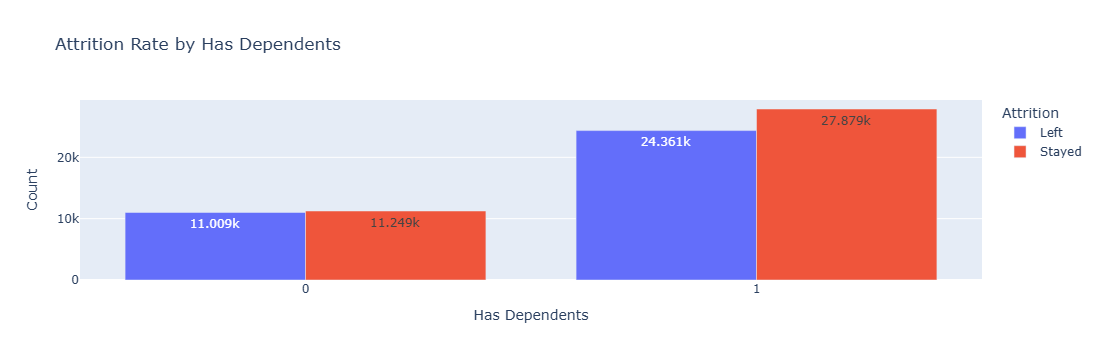

In [106]:
# Attrition Rate by Has Dependents
df_counts = extended_df.groupby(["Has Dependents", "Attrition"], observed=False).size().reset_index(name="Count")

# Create an interactive bar plot
fig = px.bar(df_counts, 
             x="Has Dependents", 
             y="Count", 
             color="Attrition", 
             title="Attrition Rate by Has Dependents",
             barmode="group",
             text_auto=True)
fig.show()

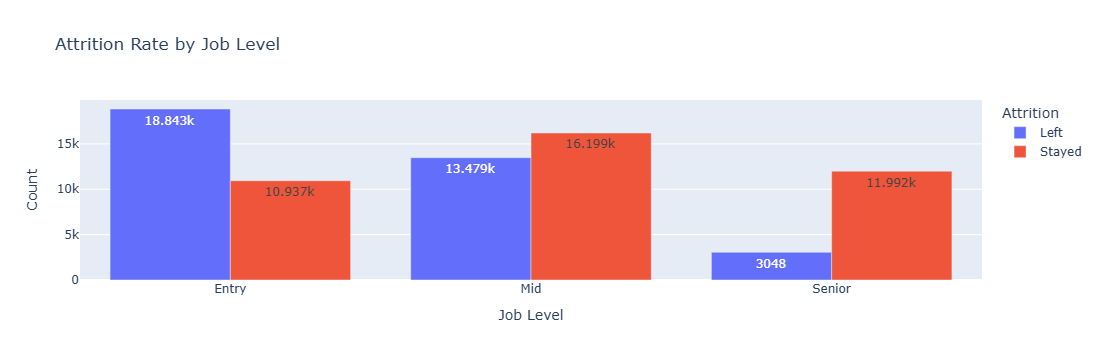

In [116]:
# Attrition Rate by Job Level
df_counts = extended_df.groupby(["Job Level", "Attrition"], observed=False).size().reset_index(name="Count")

# Create an interactive bar plot
fig = px.bar(df_counts, 
             x="Job Level", 
             y="Count", 
             color="Attrition", 
             title="Attrition Rate by Job Level",
             barmode="group",
             text_auto=True)

fig.show()

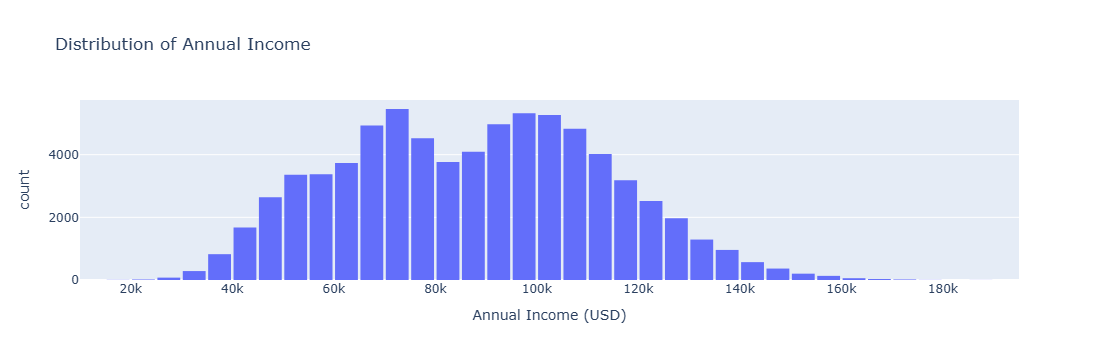

In [34]:
#Distribution of Annual Income
fig = px.histogram(extended_df, x="Annual Income", nbins=50, 
                   title="Distribution of Annual Income", 
                   labels={"Annual Income": "Annual Income (USD)"},
                   color_discrete_sequence=["#636EFA"])
fig.update_layout(bargap=0.1)
fig.show()

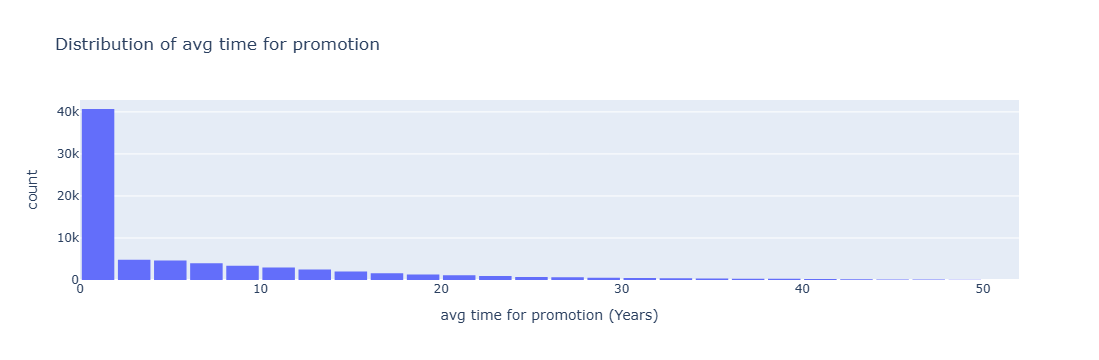

In [118]:
# Distribution of avg time for promotion
fig = px.histogram(extended_df, x="avg time for promotion", nbins=50, 
                   title="Distribution of avg time for promotion", 
                   labels={"avg time for promotion": "avg time for promotion (Years)"},
                   color_discrete_sequence=["#636EFA"])
fig.update_layout(bargap=0.1)
fig.show()

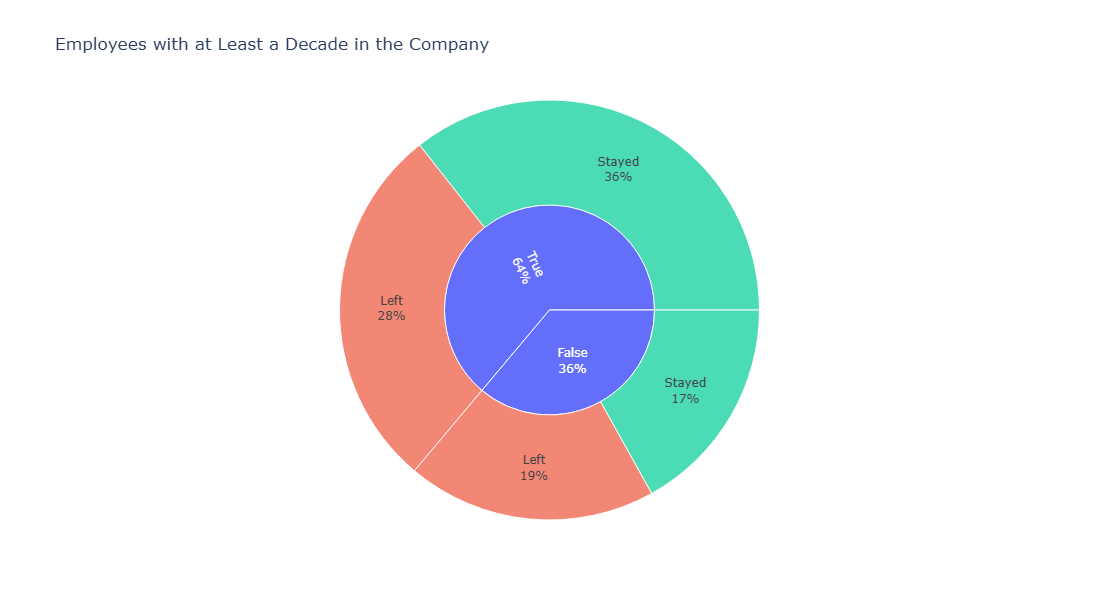

In [120]:
# Employees with at Least a Decade in the Company
fig = px.sunburst(
    extended_df, 
    path=["At Least Decade", "Attrition"], 
    title="Employees with at Least a Decade in the Company",
    color="Attrition",
)

# Show count values inside the chart
fig.update_traces(textinfo="label+percent entry")  # Shows category labels and percentages

# Adjust layout
fig.update_layout(height=600)
fig.show()

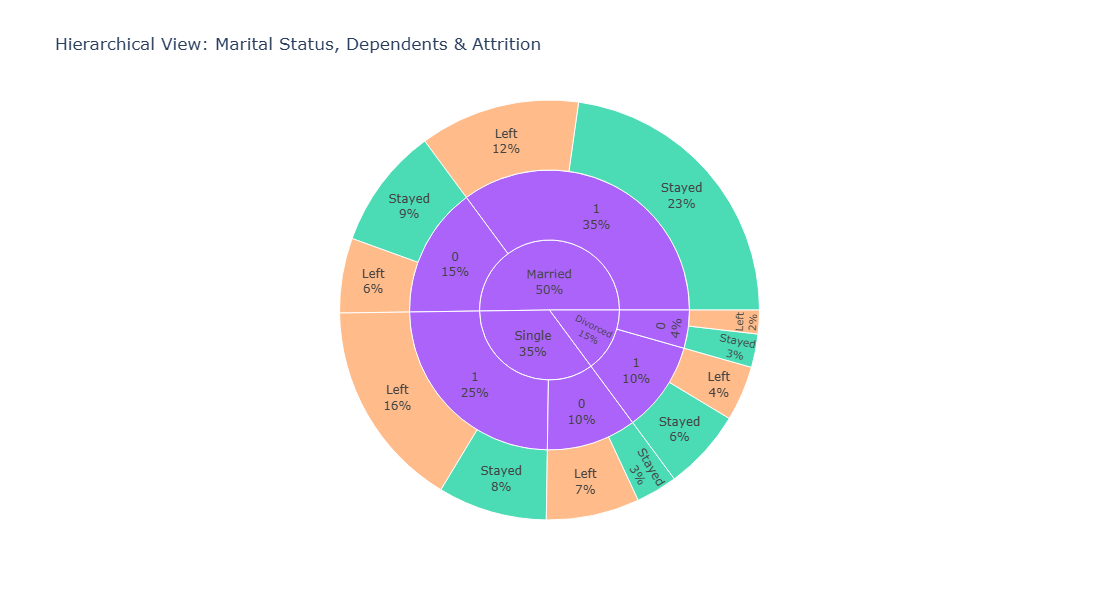

In [130]:
# Hierarchical View: Marital Status, Dependents & Attrition
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

fig = px.sunburst(extended_df, path=["Marital Status", "Has Dependents", "Attrition"], 
                  title="Hierarchical View: Marital Status, Dependents & Attrition",
                  color="Attrition", color_discrete_map={"Yes": "#EF553B", "No": "#00CC96"})

# Show count values inside the chart
fig.update_traces(textinfo="label+percent entry")  # Shows category labels and percentages

# Increase figure size
fig.update_layout(height=600)
fig.show()

- According to this pie chart, we can conclude that if you are married or divorced and you have children, you probably take fewer risks in the daily work-life and you stay at the company after all.

- People who are single, take more risks and if they do not feel comfortable or unpleasant, they may leave.

### Save the extended Dataframe as Pickle

In [126]:
folder = "data"
file_name = "extended_employee_data"

save_file_as_pickle(extended_df, folder, file_name)

File saved as: ../data/extended_employee_data_20250325.pkl
